# Zadanie 1: Sąsiedzi którzy nie wiercą w ścianie
Bajtazar jest wkurzony na swoich aktualnych głośnych sąsiadów. Imprezują, wiercą w ścianach i są głośni na całą masę innych sposobów. Bajtazar chciałby tylko w spokoju poczytać sobie zadania algorytmiczne, ale nie jest w stanie przez ten dręczący hałas!

Zaczął szukać nowego mieszkania, ale chciałby znaleźć takie, jakie będzie z dala od jakichkolwiek hałasów.

Pomóż Bajtazarowi znaleźć takie mieszkanie. Posłuży nam do tego algorytm K najbliższych sąsiadów poznany na wykładzie. Bajtazar jednak nie jest w stanie go sam napisać - pomożesz mu?

## Bajtazar bada głośność mieszkań
Bajtazar uznał że nie wytrzyma i rozstawił w całym mieście mikrofony, które sprawdzają jaka jest głośność w danej pozycji. Stworzył dataset, w którym ma miejsca ciche i głośne. Na ten moment nie ma niestety żadnych mieszkań...

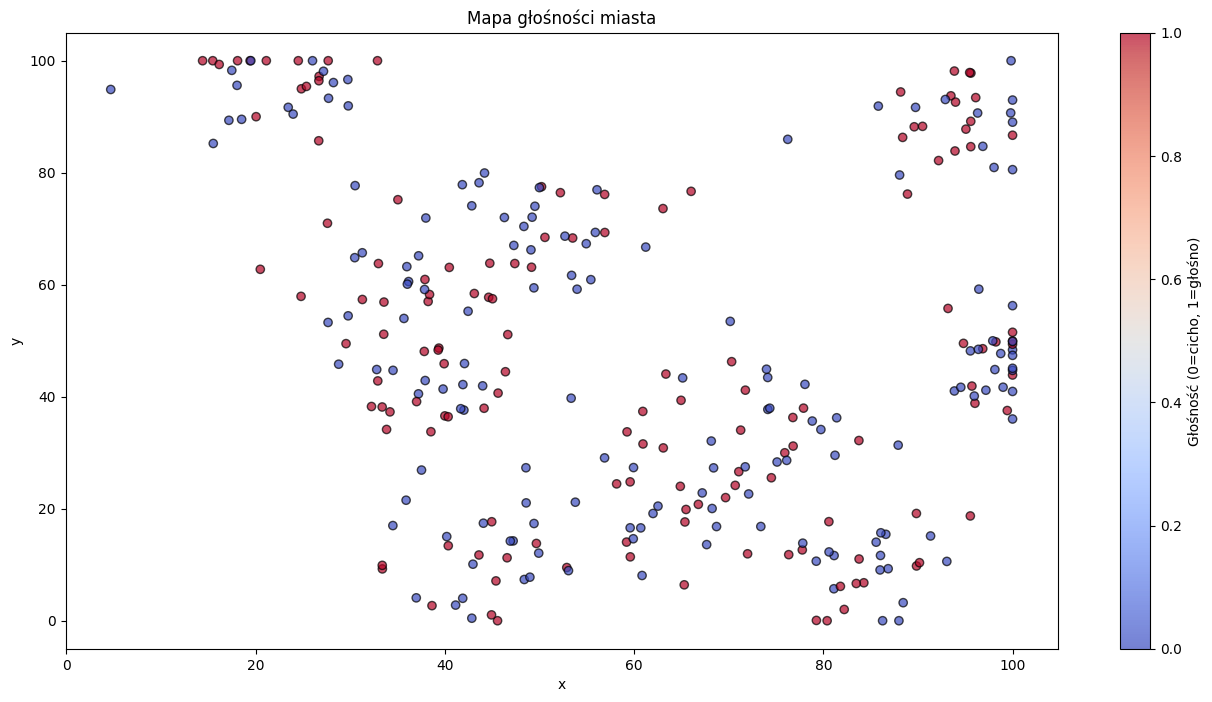

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(44)
num_samples = 300
num_clusters = 10

x_blob, y_blob = make_blobs(n_samples=num_samples, centers=num_clusters, cluster_std=6, center_box=(0, 100), random_state=44)

x_coords = np.clip(x_blob[:, 0], 0, 100)
y_coords = np.clip(x_blob[:, 1], 0, 100)

noise = np.sin(x_coords) + np.cos(y_coords) + np.random.normal(0, 1, num_samples)
threshold = 0.1
labels = (noise > threshold).astype(int)

plt.figure(figsize=(16, 8))
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta")
plt.show()

## MAMY TOOO!!1!!111!
Pojawiły się oferty mieszkań! Znajdźmy te, które będą dobre dla Bajtazara!

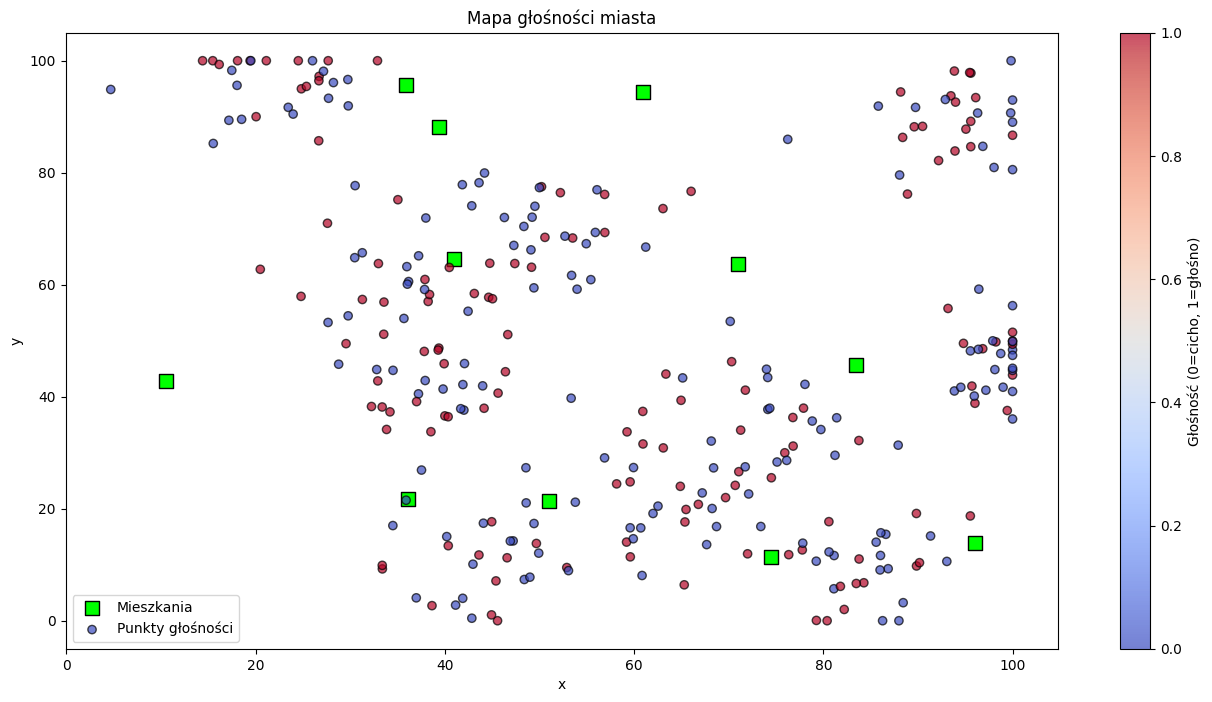

In [2]:
np.random.seed(44)
num_houses = 11
X = np.random.uniform(0, 100, num_houses)
Y = np.random.uniform(0, 100, num_houses)

plt.figure(figsize=(16, 8))
plt.scatter(X, Y, c='lime', edgecolors='black', marker='s', s=100, label="Mieszkania")
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta")
plt.legend()
plt.show()

[0.30995947427175446, 1.6142894206981842, 1.9309074517332754, 2.427639510692695, 2.5439823725357953, 2.8024587114912296, 3.5557876265244355, 3.7244987993162244, 3.9207790157200364, 4.190281582805365, 4.318332611697854, 4.477322035730191, 4.7785806788719025, 4.823363392341522, 4.838568596566609, 4.874475323843736, 5.043302884700594, 5.12846040893665, 5.2380105638706285, 5.321626217882626, 5.584482346544942, 6.209758626400104, 6.254157864637227, 6.257357638910435, 6.284575240406825, 6.409385742448212, 6.4313164514422185, 6.536511881079126, 6.5878158406491805, 6.6624811536253805, 6.679786346739581, 6.808331298135042, 6.869583498301508, 6.878026953940863, 7.089012520934598, 7.160024499786497, 7.232616536143925, 7.4579703086037945, 7.7003498330777775, 7.72371370620265, 7.783762351283736, 7.826481623290323, 7.8394899882523, 7.932916919887185, 7.939929359298407, 7.978922258788965, 7.9817708535312635, 8.068492374892891, 8.085621072980636, 8.128661349679808, 8.237681094617153, 8.250523695794845

<ipython-input-23-9d2eab516f01>:31: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, c=house_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (przewidziana głośność)")


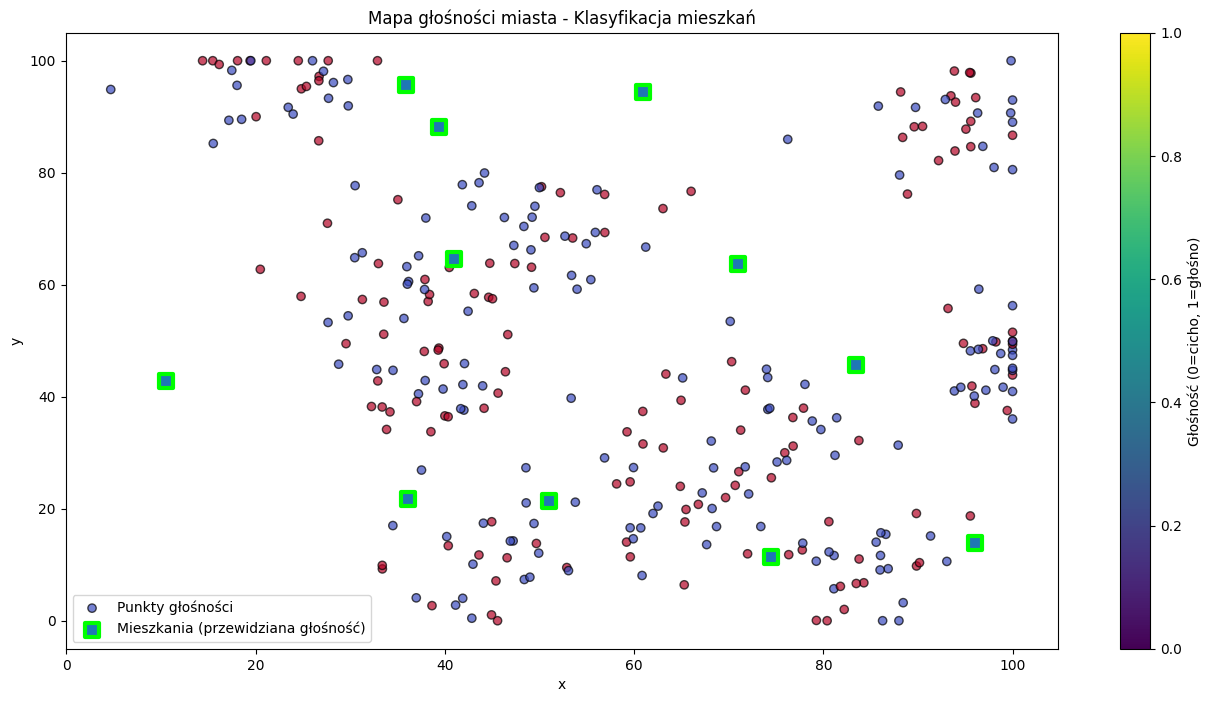

In [23]:
def euclidean_distance(p1: np.ndarray, p2: np.ndarray) -> np.float64:
    import math
    # TODO: policz dystans między punktem p1, a p2
    p3 = abs(p1 - p2)
    distance = (p3[0])**2 + (p3[1])**2
    return (math.sqrt(distance))

def knn_predict(
        train_data: np.ndarray,
        train_labels: np.ndarray,
        test_data: np.ndarray,
        k: int=5
    ):
    # TODO: napisz algorytm KNN. Spróbuj to zrobić sam, ale jakby się nie udało to poniżej masz wskazówkę.
    # print(test_data)
    list_to_sort = []
    for item in test_data:
      for item2 in train_data:
        list_to_sort.append(euclidean_distance(item, item2))

    print(sorted(list_to_sort))

train_data = [np.array([x, y]) for x, y in zip(x_coords, y_coords)]
train_labels = labels
test_data = [np.array([x, y]) for x, y in zip(X, Y)]

house_labels = knn_predict(train_data, train_labels, test_data, k=5)

plt.figure(figsize=(16, 8))
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=house_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (przewidziana głośność)")
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Klasyfikacja mieszkań")
plt.legend()
plt.show()


---

Wskazówka: pseudokod będzie wyglądał następująco

1. dla każdego punktu p z test_data:
    - policz odległość do każdego punktu z train_data
    - posortuj po dystansie
    - weź k pierwszych wyników
    - wybierz z nich najczęściej powtarzającą się klasę
---

Wow super, że nam się udało! Bardzo dobrze ci poszło! Skoro już wiemy jak to działa to przyjrzyjmy się jak to zrobić, korzystając gotowej biblioteki `scikit-learn` i klasy [KNeighorsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) robi to samo co my. Jeśli chcesz możesz spróbować sam!

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # importujemy (po resztę rzeczy zobacz w dokumentacji - link jest wyżej)



---
*<br>
*<br>
*<br>
*<br>
*<br>
*<br>
*<br>
*<br> * Poniżej rozwiązanie
<br>
*<br>
*<br>
*<br>
*<br>
*<br>
*<br>
*<br>
*<br>

---

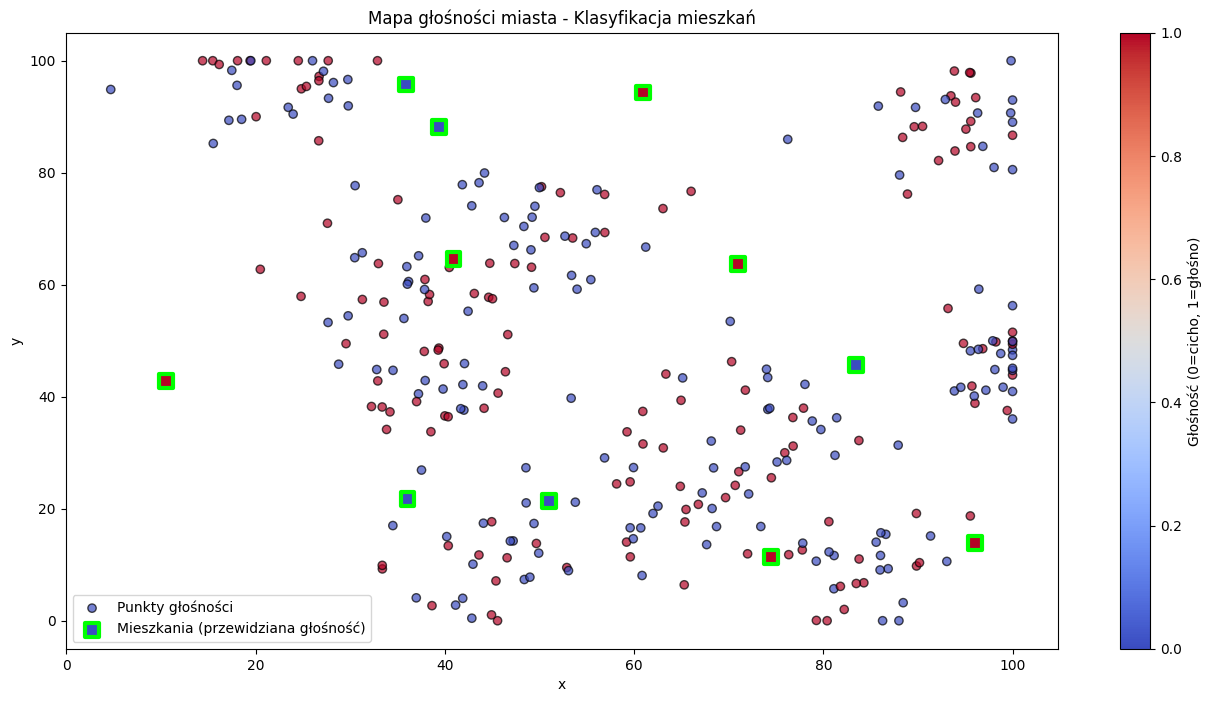

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # importujemy

# Tworzenie klasy i dopasowanie jej do danych treningowych
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)

# Znajdujemy głośność mieszkań
house_labels = knn.predict(test_data)

# Wyświetlenie wyników
plt.figure(figsize=(16, 8))
plt.scatter(x_coords, y_coords, c=labels, cmap='coolwarm', edgecolors='k', alpha=0.7, label="Punkty głośności")
plt.scatter(X, Y, c=house_labels, cmap='coolwarm', edgecolors='lime', linewidth=3, marker='s', s=100, label="Mieszkania (przewidziana głośność)")
plt.colorbar(label="Głośność (0=cicho, 1=głośno)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mapa głośności miasta - Klasyfikacja mieszkań")
plt.legend()
plt.show()

# Super robota!
Udało wam się pomóc Bajtazarowi i nauczyliśmy się używać KNN z biblioteki `sklearn` to możemy się z nim trochę pobawić! KNN jest bardzo znanym i lubianym algorytmem i jest używany w wielu miejscach.

# 🦁 Zadanie 2 (z gwiazdką, ale przyjemne i przydatne): Elektroniczny Pomocnik ZOO Wrocławskiego
## 🔔 Zlecenie specjalne od ZOO Wrocławskiego!
ZOO zatrudniło Cię jako twórcę inteligentnego pomocnika, który będzie odpowiadał na pytania odwiedzających. Turyści pytają o różne zwierzęta, a pracownicy nie zawsze są pod ręką. Dlatego potrzebują systemu, który:

✅ znajdzie odpowiednie informacje o zwierzętach,
✅ sformułuje na ich podstawie sensowną, rzetelną odpowiedź.

## ❗ Problem z obecnym rozwiązaniem
Pracownicy próbowali już używać zwykłego modelu językowego, ale odpowiedzi były często:

*   zbyt ogólne,
*   oderwane od faktów,
*   niezwiązane z tym, co mają w bazie wiedzy.

Dlatego ZOO potrzebuje bardziej inteligentnego systemu, który łączy wiedzę z danych z umiejętnością generowania odpowiedzi.

## 🎯 Twój cel: Zbuduj Elektronicznego Pomocnika typu miniRAG
System typu miniRAG (Retrieval-Augmented Generation) działa w 4 krokach:

1. Użytkownik zadaje pytanie (np. „Czy pingwiny potrafią latać?”)
2. System wyszukuje najbardziej podobne opisy zwierząt (retriever: TfidfVectorizer + KNN)
3. Tworzy prompt: pytanie + znalezione opisy jako kontekst
4. Model językowy generuje na tej podstawie odpowiedź

---

## Zoo dostarcza nam dokumenty do generacji.

In [ ]:
documents = [
    "Słonie są największymi ssakami lądowymi i żyją w stadach.",
    "Pingwiny nie latają, ale świetnie pływają. Żyją głównie na półkuli południowej.",
    "Lwy to drapieżniki, które żyją w grupach zwanych stadami.",
    "Flamingi mają długie nogi i różowe pióra. Często stoją na jednej nodze.",
    "Zebry mają charakterystyczne czarno-białe pasy, które pomagają im się kamuflować.",
    "Nietoperze to jedyne ssaki zdolne do aktywnego lotu.",
    "Goryle to największe małpy człekokształtne. Są inteligentne i potrafią używać narzędzi.",
    "Pandy żywią się głównie bambusem i są symbolem ochrony przyrody.",
    "Hipopotamy spędzają większość dnia w wodzie, by chronić się przed słońcem.",
    "Żyrafy mają bardzo długie szyje, które umożliwiają im zrywanie liści z wysokich drzew.",
    "Surykatki żyją w koloniach i pełnią straż, ostrzegając przed niebezpieczeństwem.",
    "Wilki to zwierzęta stadne, które potrafią doskonale współpracować podczas polowania.",
    "Krokodyle mają potężne szczęki i żyją w rzekach oraz bagnach.",
    "Tygrysy to samotne drapieżniki, które świetnie pływają i mają charakterystyczne paski.",
    "Nosorożce mają grubą skórę i róg na pysku. Są zagrożone wyginięciem."
]

Spróbujmy zamienić je na wektory. Bajtazar mówił, że słyszał o `sklearn.feature_extraction.text.TfidfVectorizer` i znalazł nawet jakąś [dokumentację](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), w której ponoć są przykłady jak tego użyć. Spróbuj napisać funkcję zamieniającą zdanie na np.array.

---

Zachęcam poszukać samemu, ale jeśli nie wiesz jakich funkcji używać to przydatne mogą być [spoiler1](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform) [spoiler2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.transform)


In [ ]:
# Spróbuj dać tu dopasowany kod z przykładu

doc_vectors = ...

Wow mamy już przykłady zamienione na punkty! Teraz wczytajmy pytanie użytkownika i zamieńmy je na wektor

In [ ]:
question = input("🦉 Zadaj pytanie o zwierzęta w ZOO: ")

# użyj stworzonej chwilę wcześniej "maszynki" żeby zrobić wektor z pytania
question_vec = ...

🦉 Zadaj pytanie o zwierzęta w ZOO: czym są pingwiny?


Spróbujmy teraz użyć KNN napisanego z użyciem `sklearn`, żeby wyszukać "najbliższe" opisy zwierząt do naszego pytania.

---
Jeśli coś nie wychodzi (dostajemy zły kontekst) to poniżej będzie wskazówka

In [ ]:
# zapimportuj KNN z biblioteki sklearn
from sklearn.neighbors import ...

# stwórz i wytrenuj KNN
knn = ...

In [ ]:
# znajdź indeksy najbliższe wektorowi question_vec


In [ ]:
# stwórz kontekst - opis/y z zmiennej documents
context = ...

Super! Udało nam się! Reszta już idzie tak jak wcześniej nasze ZOO próbowało.

In [ ]:
# tworzenie prompta
prompt = f"Kontekst:\n{context}\n\nPytanie: {question}\nOdpowiedź:"

In [ ]:
# ładowanie modelu językowego za pomocą biblioteki transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

model_id = "eryk-mazus/polka-1.1b"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.44M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.30G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
# generowanie
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, temperature=0.7)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I na koniec jeszcze szybkie wyświetlanie odpowiedzi i tego jaki mieliśmy kontekst:

In [ ]:
print("\n📚 Kontekst użyty do odpowiedzi:\n", context)
print("\n🤖 Odpowiedź pomocnika ZOO:\n", answer.split("Odpowiedź:")[-1].strip())


📚 Kontekst użyty do odpowiedzi:
 - Pingwiny nie latają, ale świetnie pływają. Żyją głównie na półkuli południowej.

🤖 Odpowiedź pomocnika ZOO:
 to niewielkie ssaki lądowe, żyjące głównie w ciemnościach.


A jak to wygląda bez kontekstu?

In [ ]:
inputs = tokenizer(question, return_tensors="pt")
outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, temperature=0.7)
answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

print("\n🤖 Odpowiedź pomocnika ZOO bez kontekstu:\n", answer.strip())

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.



🤖 Odpowiedź pomocnika ZOO bez kontekstu:
 czym są pingwiny? - Forum 2021 - RODZICE.PL\nMamy w domu dwie pingwinki…. mieszkające na parapecie w mieszkaniu, tylko że nasze to czerwone, jednorożce, a tych w czapeczkach to nie wiemy czy są pingwiny czy nie…. chodzi mi o to, że są niewielkie, czyli wyglądają jak pingwinki,



Wskazówka jeśli kontekst jest inny niż powienien: Może musimy spróbować innej metryki? (możesz dopytać prowadzącego o to co to znaczy, jak nie na zajęciach to na discordzie)

Jeśli miałbyś inne pytania odnośnie RAG-ów to zgłoś się do nas najlepiej przez discorda (ktoś inny może mieć takie samo pytanie)